
# Logistic Regression Model - DSJ Pakistan

In this project we will be working with an advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries


In [3]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data


In [4]:
adv_data = pd.read_csv(r'D:\documents\IBA\AAMD\advertising.csv')

In [5]:
adv_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0


In [6]:
adv_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## Exploratory Data Analysis

Let's use seaborn to explore the data!


**Histogram of the Age**

<AxesSubplot:xlabel='Age', ylabel='Count'>

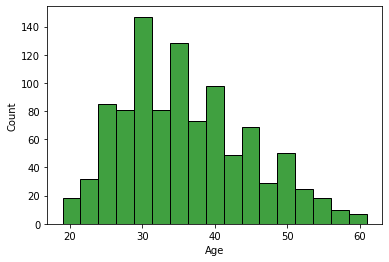

In [8]:
sns.histplot(data = adv_data, x = 'Age', color = 'green')

**Jointplot showing Area Income versus Age.**

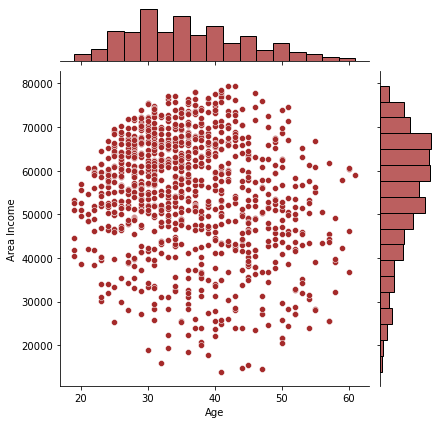

In [9]:
sns.jointplot(data = adv_data, x = 'Age', y = 'Area Income', color = 'brown')

**Jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

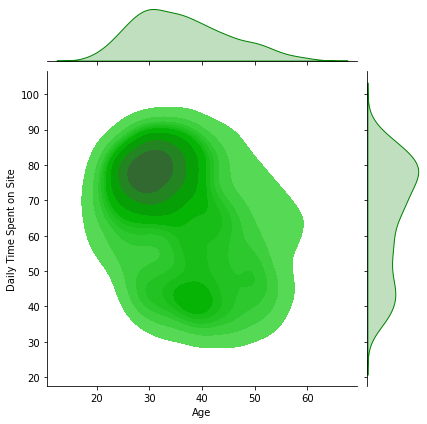

In [10]:
sns.jointplot(data = adv_data, x = 'Age', y = 'Daily Time Spent on Site', kind = 'kde', color = 'green', fill = 1)

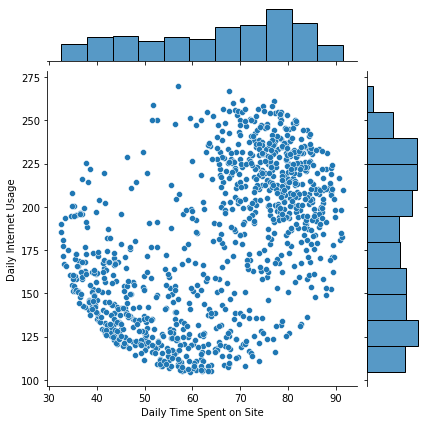

In [11]:
sns.jointplot(data = adv_data, x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', kind = 'scatter', ratio = 5)

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

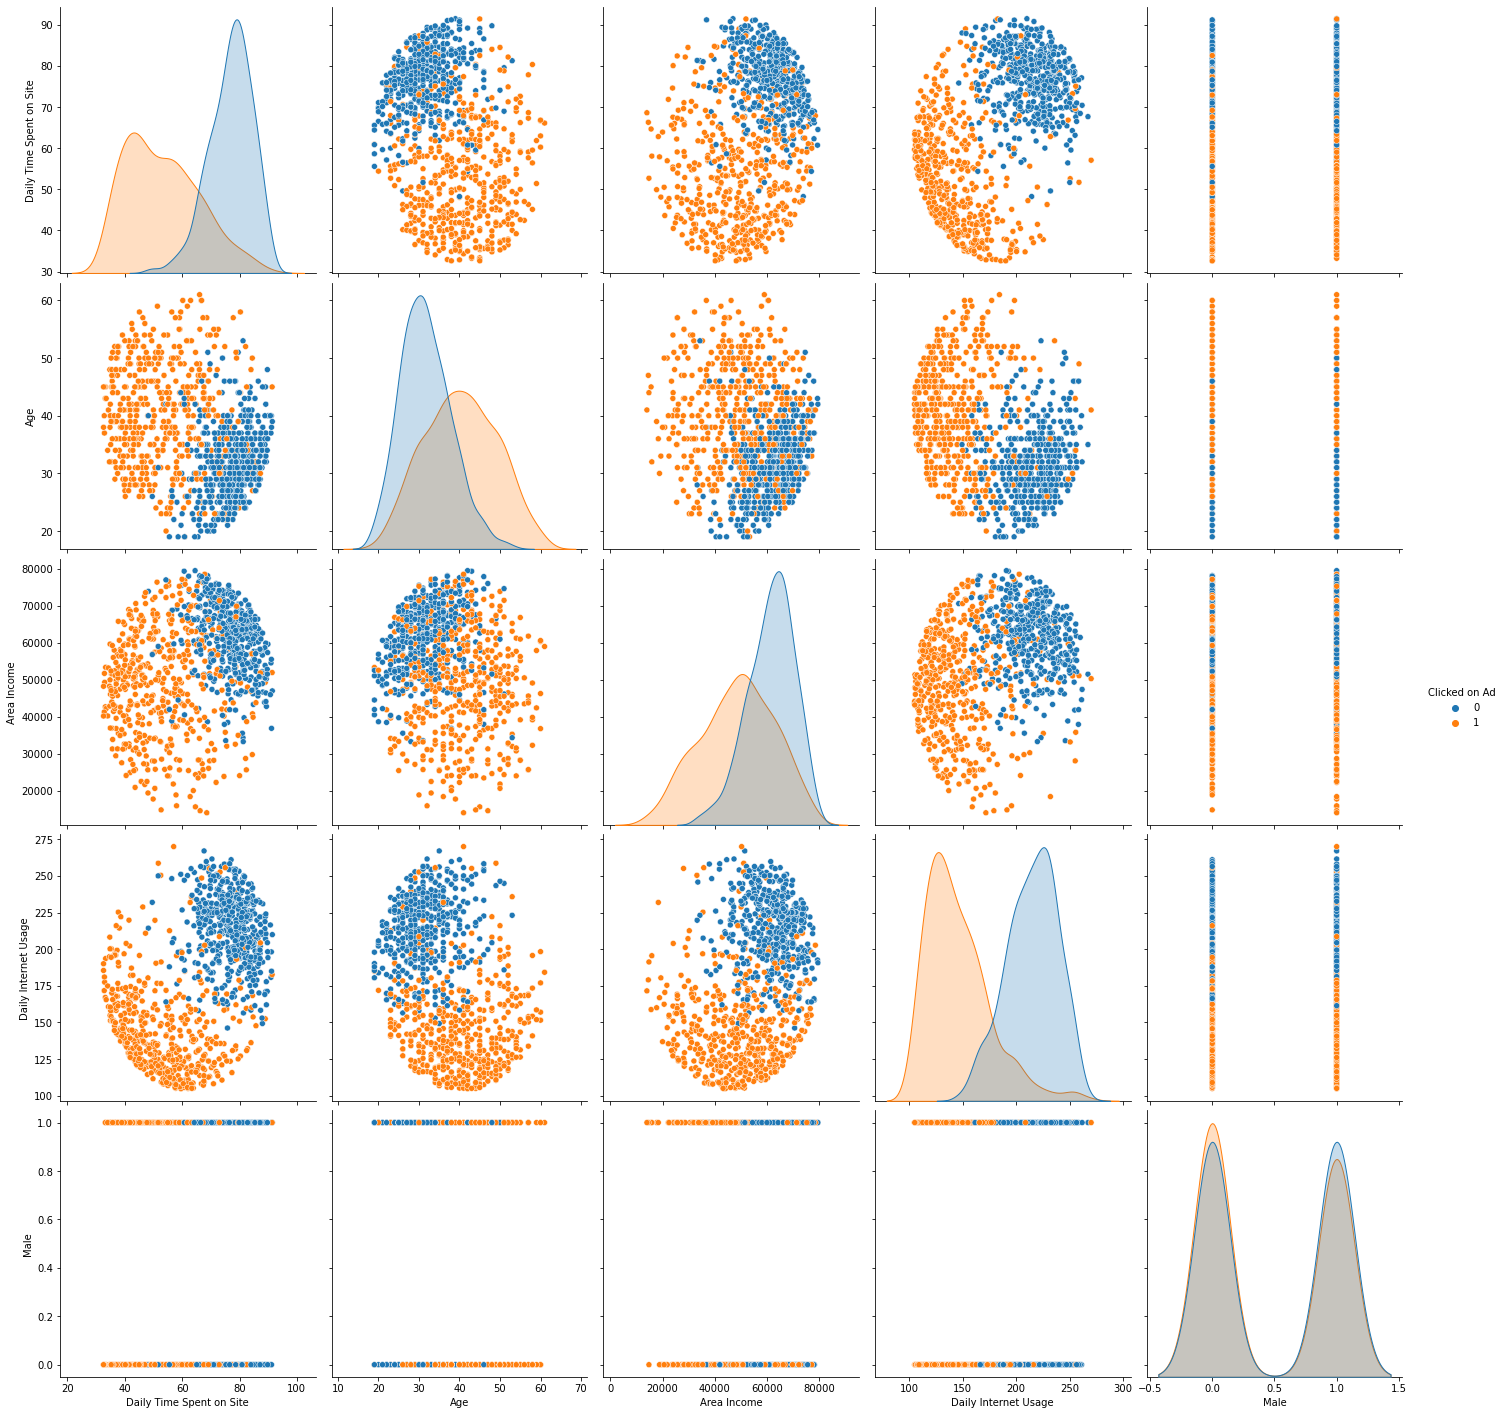

In [12]:
sns.pairplot(data = adv_data, hue = 'Clicked on Ad', height = 4)

# Logistic Regression

Now it's time to do a train test split, and train our model!

** Split the data into training set and testing set using train_test_split**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = adv_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Male', 'Daily Internet Usage']]
Y = adv_data['Clicked on Ad']
print(X)
print(Y)

     Daily Time Spent on Site  Age  Area Income  Male  Daily Internet Usage
0                       68.95   35     61833.90     0                256.09
1                       80.23   31     68441.85     1                193.77
2                       69.47   26     59785.94     0                236.50
3                       74.15   29     54806.18     1                245.89
4                       68.37   35     73889.99     0                225.58
..                        ...  ...          ...   ...                   ...
995                     72.97   30     71384.57     1                208.58
996                     51.30   45     67782.17     1                134.42
997                     51.63   51     42415.72     1                120.37
998                     55.55   19     41920.79     0                187.95
999                     45.01   26     29875.80     0                178.35

[1000 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
995    1


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.67, random_state = 42)
print(X_train)
print(Y_train)

     Daily Time Spent on Site  Age  Area Income  Male  Daily Internet Usage
703                     77.65   28     66198.66     0                208.01
311                     69.74   49     66524.80     0                243.37
722                     39.47   43     65576.05     1                163.48
629                     73.94   26     55411.06     1                236.15
0                       68.95   35     61833.90     0                256.09
..                        ...  ...          ...   ...                   ...
106                     72.23   25     46557.92     1                241.03
270                     44.49   53     63100.13     1                168.00
860                     91.37   45     51920.49     1                182.65
435                     56.66   42     72684.44     0                139.42
102                     89.91   40     59593.56     0                194.23

[670 rows x 5 columns]
703    0
311    0
722    1
629    0
0      0
      ..
106    0
2

**Train and fit a logistic regression model on the training set.**

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logistic_model = LogisticRegression(class_weight='balanced')
logistic_model = logistic_model.fit(X_train, Y_train)

## Predictions and Evaluations
** Now predict values for the testing data.**

**Hard Prediction**

Negative Class = 0

Positive Class = 1

In [18]:
hard_prediction = logistic_model.predict(X_test)
hard_prediction

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,

**Soft Prediction**

Class Probabilities:

    -First column is the predicted probability of class 0
    -Second column is the predicted probability of class 1

In [19]:
soft_prediction = logistic_model.predict_proba(X_test)[:15]
soft_prediction

array([[0.50340389, 0.49659611],
       [0.0032943 , 0.9967057 ],
       [0.05319307, 0.94680693],
       [0.01116648, 0.98883352],
       [0.96707131, 0.03292869],
       [0.70293292, 0.29706708],
       [0.97364671, 0.02635329],
       [0.0100495 , 0.9899505 ],
       [0.67660131, 0.32339869],
       [0.05447533, 0.94552467],
       [0.97808583, 0.02191417],
       [0.09539892, 0.90460108],
       [0.00303671, 0.99696329],
       [0.97304126, 0.02695874],
       [0.08435632, 0.91564368]])

In [20]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,hard_prediction))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

